### Importing the libraries and packages

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
#import os
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [3]:
#reading data
data = pd.read_csv("C:/Users/Hello/Downloads/project_data.csv")
data

,Access No.,LastName,FirstName,Contact,Accounts,Registration,Other_Accounts,Other_Registration
0,A22222,Jamu,Paul,726819217,tellers,reg_area,NaN,Agent registration where different people are ...
1,A366367,Thee No,Worries,2147483647,faculty,reg_area,NaN,NaN
2,A79565,ashley,kemunto,705646553,online,online,NaN,NaN
3,A79883,Nampala,Mildred,700712672,faculty,online,NaN,NaN
4,A82084,Ileju,Tabitha,780374929,online,online,NaN,NaN
...,...,...,...,...,...,...,...,...
81,B22781,Victoria,Mirembe,705612409,deadlines,online,NaN,NaN
82,B23293,Mbeiza Rachel,Mbeiza Rachel,707125552,online,online,NaN,NaN
83,B23389,GOLYO,EMMANUEL,787068220,faculty,reg_area,NaN,NaN
84,B23415,Mawejje,John Paul,704284342,online,reg_area,NaN,NaN


In [83]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.shape

(86, 8)

## Exploratory Data Analysis (`EDA`)
### Missing values

- checking for missing values

In [5]:
#checking for missing values
missing_values = data.isnull().sum()
missing_values

Access No.             0
LastName               0
FirstName              0
Contact                0
Accounts               3
Registration           6
Other_Accounts        83
Other_Registration    81
dtype: int64

## Dealing with missing values
- Imputing for the missing values

In [6]:
data['Accounts'].fillna(data['Accounts'].mode()[0], inplace= True)

In [7]:
data['Registration'].fillna(data['Registration'].mode()[0], inplace= True)

- Since others are opinions from the users, `we shall not` drop those values but rather deal with the null values through binary encoding.

In [8]:
data['Other_Accounts'] = data['Other_Accounts'].notnull().astype(int)
data['Other_Registration'] = data['Other_Registration'].notnull().astype(int)

In [9]:
data.head(10)

,Access No.,LastName,FirstName,Contact,Accounts,Registration,Other_Accounts,Other_Registration
0,A22222,Jamu,Paul,726819217,tellers,reg_area,0,1
1,A366367,Thee No,Worries,2147483647,faculty,reg_area,0,0
2,A79565,ashley,kemunto,705646553,online,online,0,0
3,A79883,Nampala,Mildred,700712672,faculty,online,0,0
4,A82084,Ileju,Tabitha,780374929,online,online,0,0
5,A82987,Shadrack,Eunyu,787110192,online,reg_area,0,0
6,A82988,shadrack,Eunyu,787110192,faculty,reg_area,0,0
7,A8347,Grace,Kedi,789214560,online,reg_area,0,0
8,A85561,KAMPI,DAPHINE FLORENCE,701175216,tellers,online,0,0
9,A87231,Sandra,Nekesa,708126548,online,reg_area,0,0


- conforming that data does not have any missing values left apart from the others' columns

In [10]:
data.isnull().any()

Access No.            False
LastName              False
FirstName             False
Contact               False
Accounts              False
Registration          False
Other_Accounts        False
Other_Registration    False
dtype: bool

In [11]:
data.isnull().sum()

Access No.            0
LastName              0
FirstName             0
Contact               0
Accounts              0
Registration          0
Other_Accounts        0
Other_Registration    0
dtype: int64

### Feature selection

In [12]:
data = data.drop(columns= ['Access No.', 'LastName', 'FirstName','Contact'])

In [13]:
data.head()

,Accounts,Registration,Other_Accounts,Other_Registration
0,tellers,reg_area,0,1
1,faculty,reg_area,0,0
2,online,online,0,0
3,faculty,online,0,0
4,online,online,0,0


 ## `Visualizing data`

In [14]:
def Distribution_plots(data):
    plt.figure(figsize=(20,15))
    for i,col in enumerate(data):
        sns.displot(data, x = col, color= 'red')
        plt.title('Distribution of ' + col)
        plt.show()

<Figure size 2000x1500 with 0 Axes>

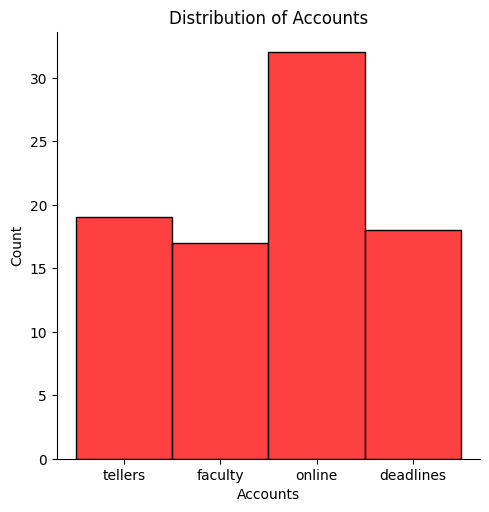

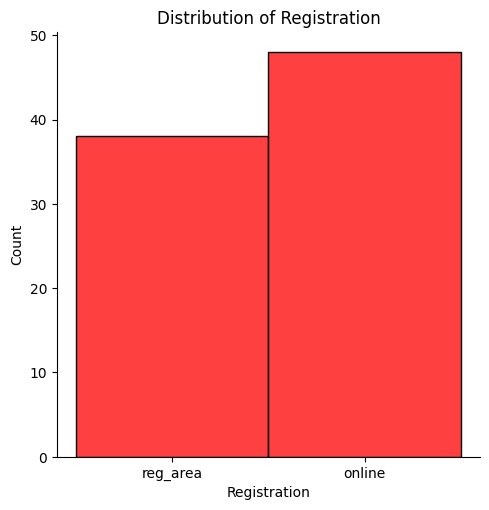

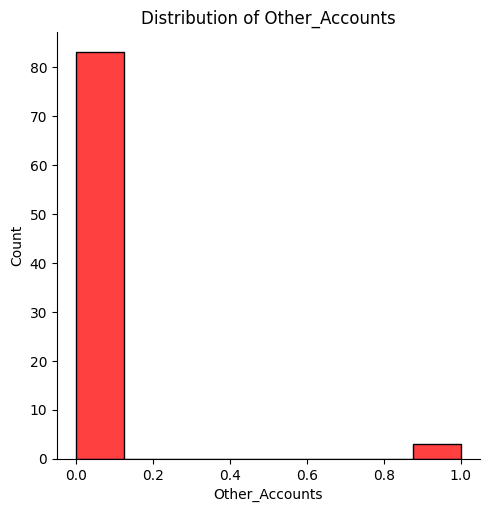

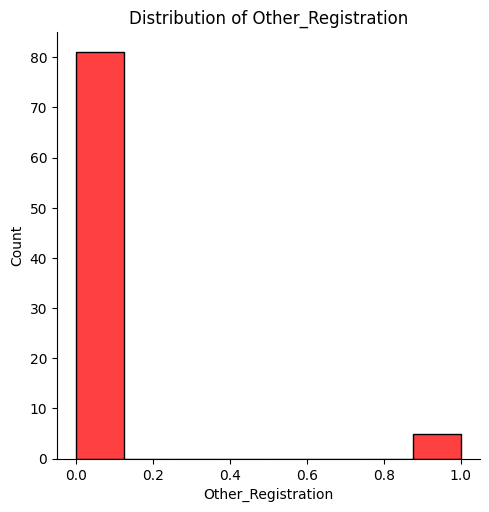

In [15]:
Distribution_plots(data)

In [16]:
def Distribution_plots1(data):
    plt.figure(figsize=(20,15))
    for i,col in enumerate(data):
        sns.catplot(data, x = col, kind = 'count')
        plt.title('Distribution of ' + col)
        plt.show()

<Figure size 2000x1500 with 0 Axes>

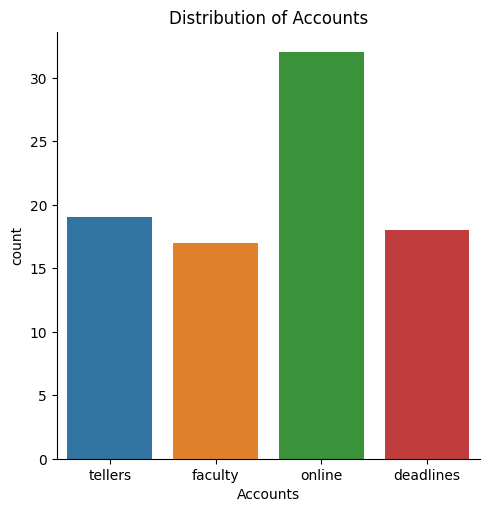

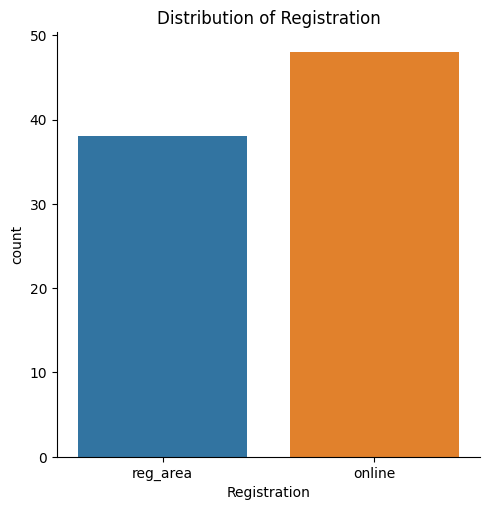

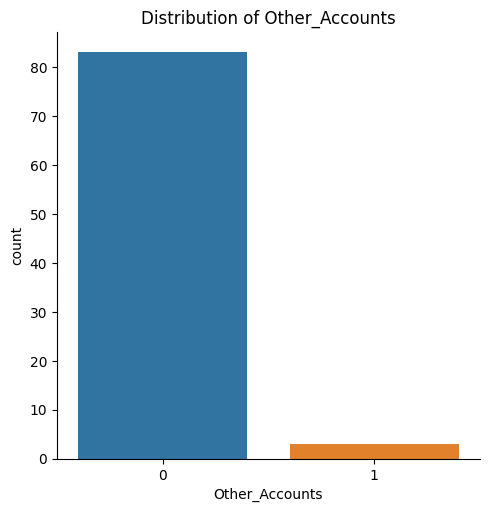

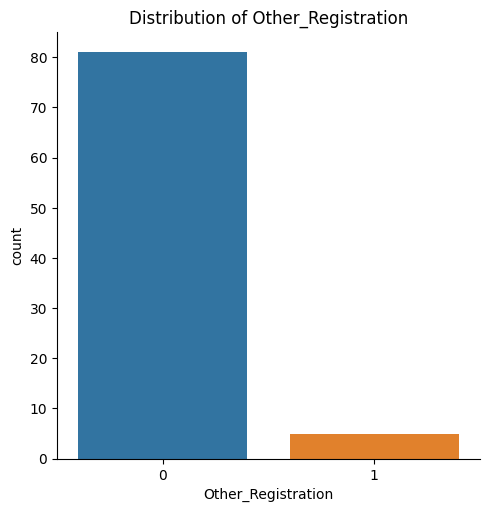

In [17]:
Distribution_plots1(data)

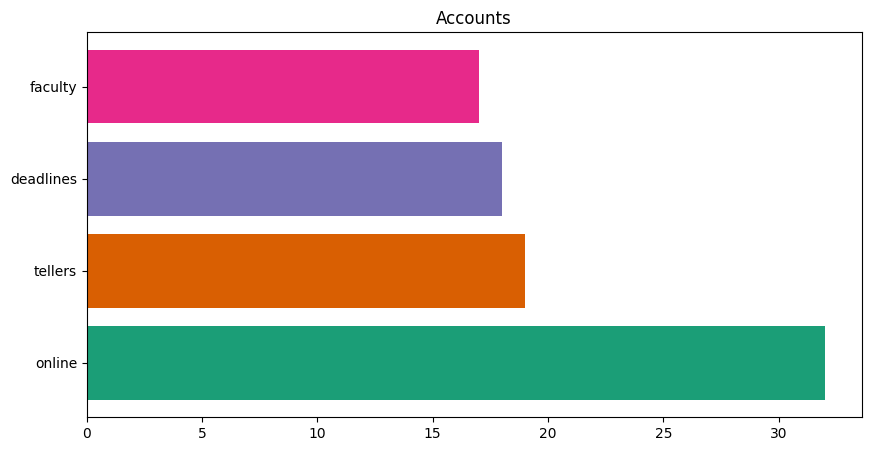

In [18]:
def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  plt.figure(figsize=(10,5))
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
plot = categorical_histogram(data, *['Accounts'], **{})
plot

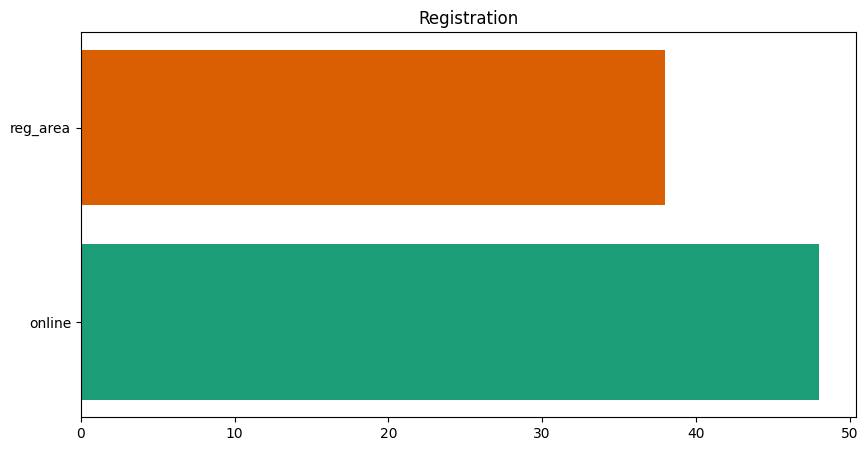

In [125]:
def categorical_hist(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  plt.figure(figsize=(10,5))
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
plot = categorical_hist(data, *['Registration'], **{})

In [19]:

def pieChart(data):
    for col in data:
        counts = data[col].value_counts()
        plt.figure(figsize=(8,8))
        plt.pie(counts, labels = counts.index, autopct= '%1.1f%%', startangle=90)
        plt.title('Distributions of '+ col)
        plt.axis('equal')

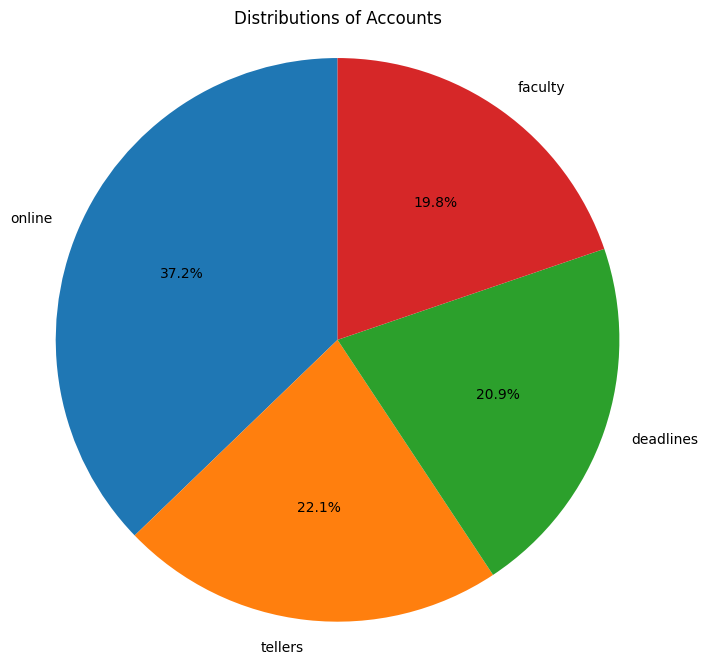

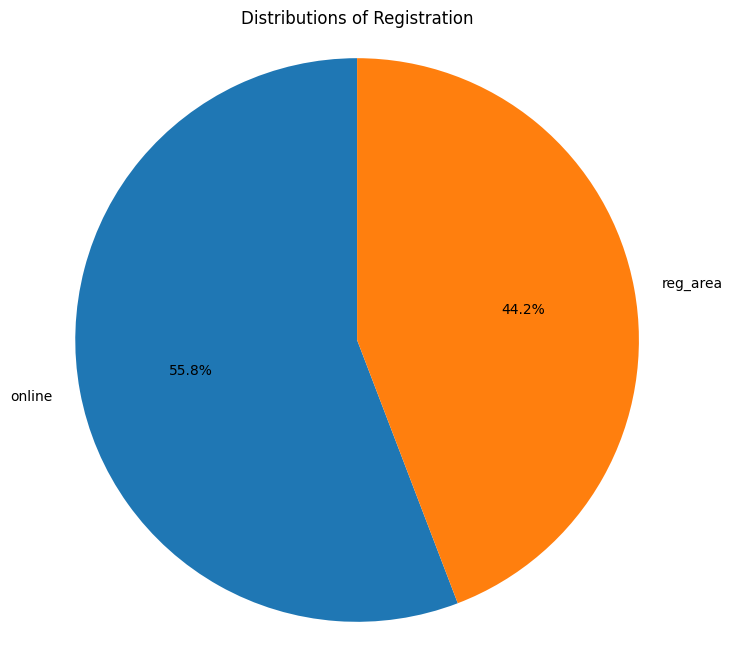

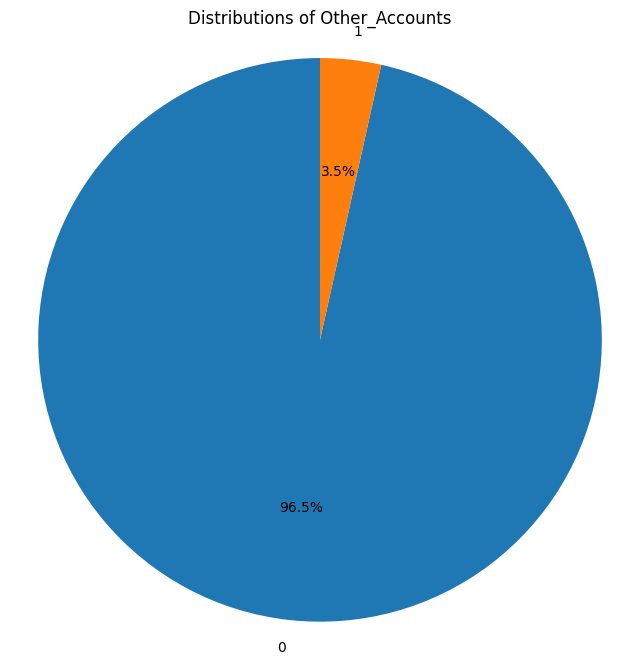

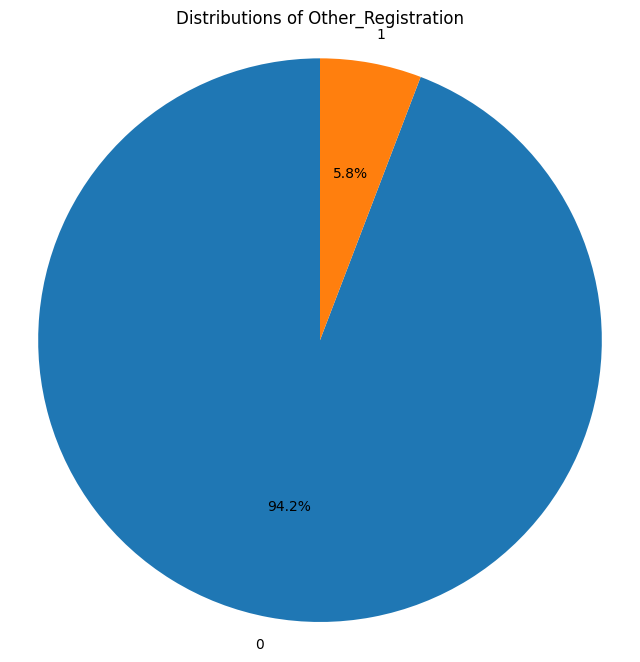

In [ ]:
pieChart(data)

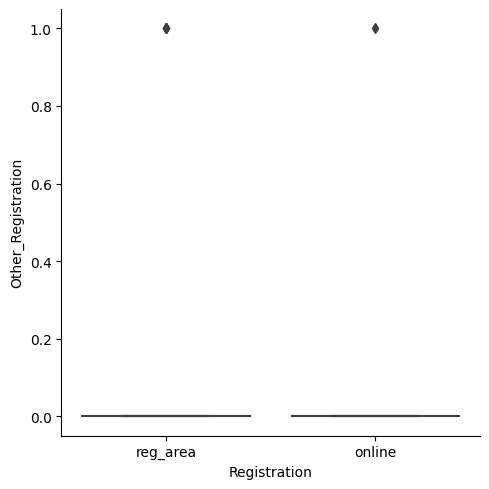

In [100]:
sns.catplot(data=data, x="Registration", y="Other_Registration", kind="box")

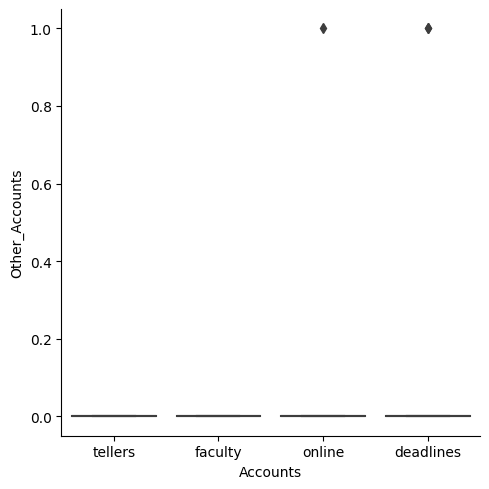

In [101]:
sns.catplot(data=data, x="Accounts", y="Other_Accounts", kind="box")

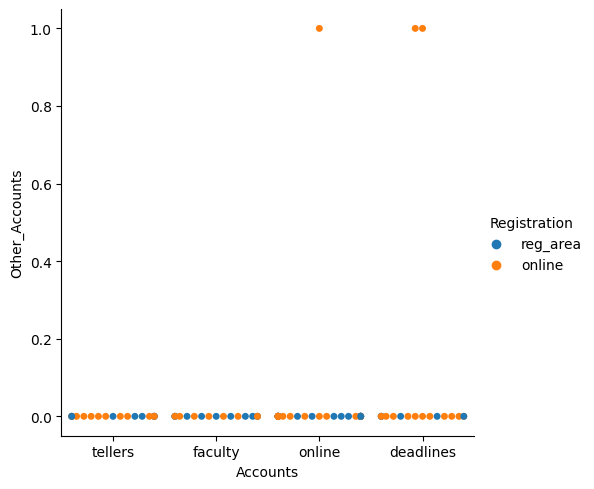

In [102]:
sns.catplot(data=data, x="Accounts", y="Other_Accounts", hue="Registration", kind="swarm")


Removing the outlier points

In [103]:
## using the IQR method
q1 = data['Other_Accounts'].quantile(.25)
q3 = data['Other_Accounts'].quantile(.75)
IQR = q3-q1

upper_boundary = q3 + 1.5*IQR
lower_boundary = q1 - 1.5*IQR
data['Other_Accounts'] = np.where(data['Other_Accounts']>upper_boundary,upper_boundary,data['Other_Accounts'])
data['Other_Accounts'] = np.where(data['Other_Accounts'] < lower_boundary,lower_boundary,data['Other_Accounts'] )

In [104]:
## using the IQR method
q1 = data['Other_Registration'].quantile(.25)
q3 = data['Other_Registration'].quantile(.75)
IQR = q3-q1

upper_boundary = q3 + 1.5*IQR
lower_boundary = q1 - 1.5*IQR
data['Other_Registration'] = np.where(data['Other_Registration']>upper_boundary,upper_boundary,data['Other_Registration'])
data['Other_Registration'] = np.where(data['Other_Registration'] < lower_boundary,lower_boundary,data['Other_Registration'] )

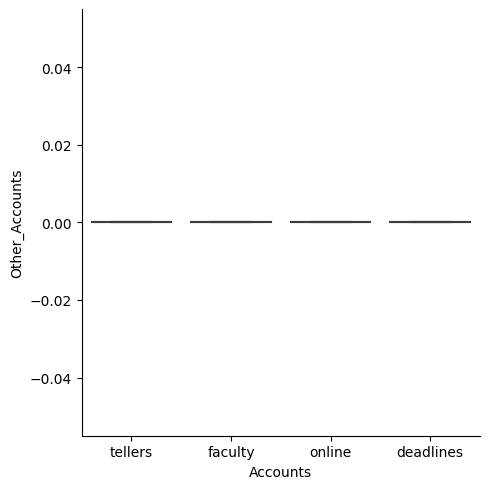

In [105]:
sns.catplot(data=data, x="Accounts", y="Other_Accounts", kind="box")

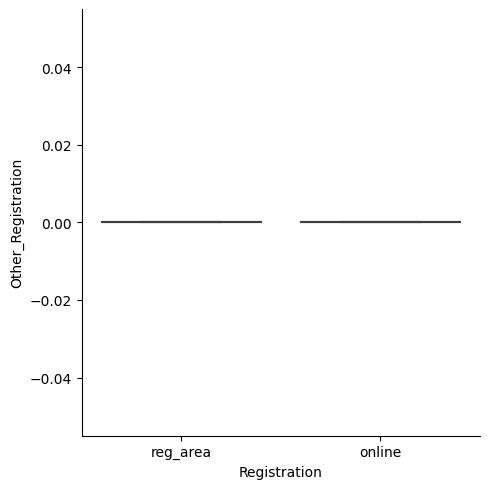

In [106]:
sns.catplot(data=data, x="Registration", y="Other_Registration", kind="box")

# `Relationships between the data`      

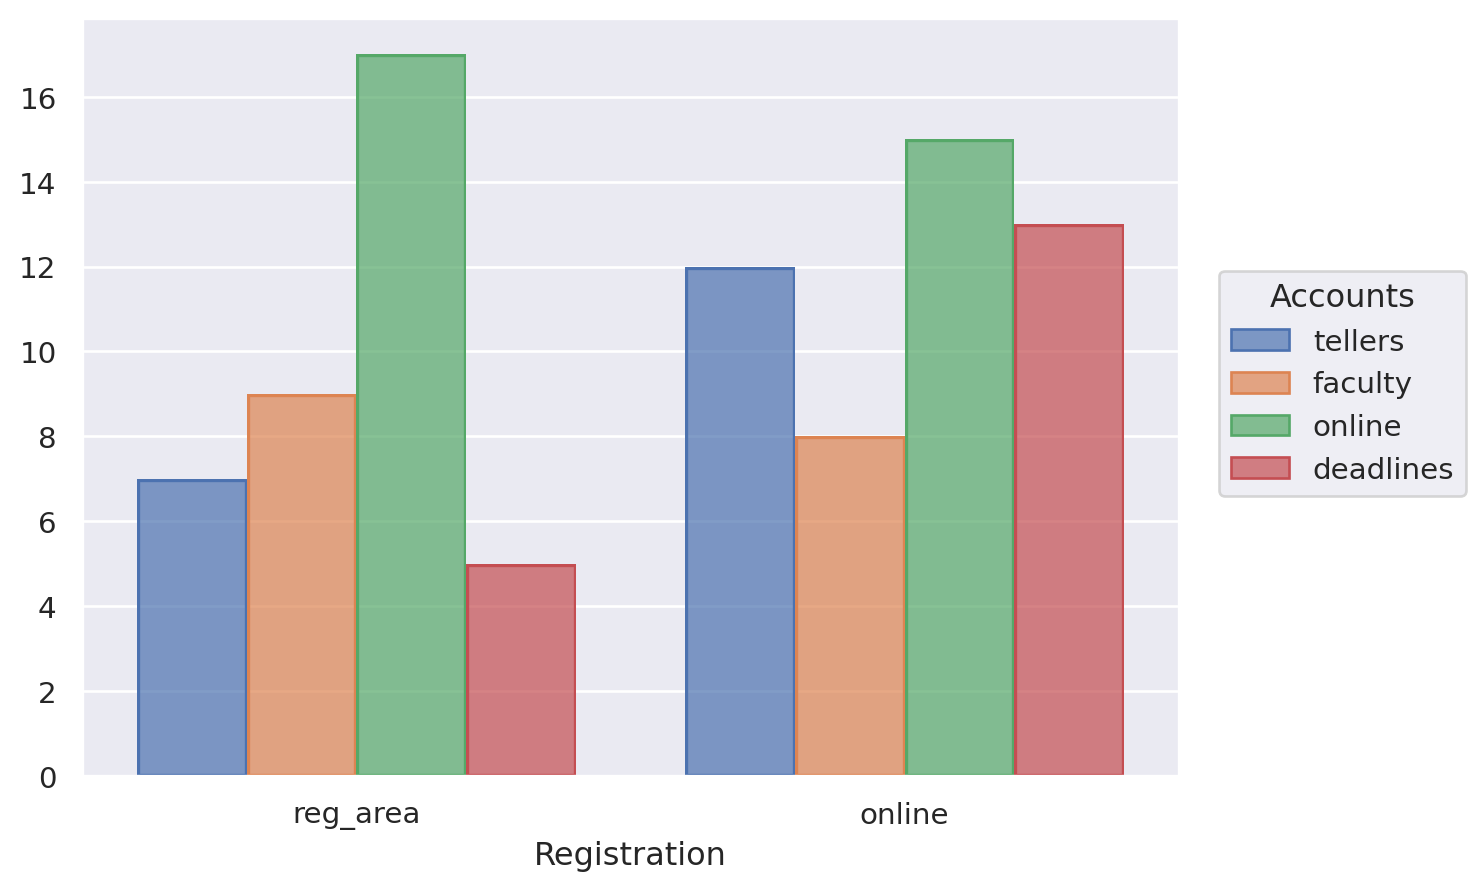

In [107]:
import seaborn.objects as so
so.Plot(data,x= "Registration", color = "Accounts").add(so.Bar(),so.Hist(),so.Dodge())

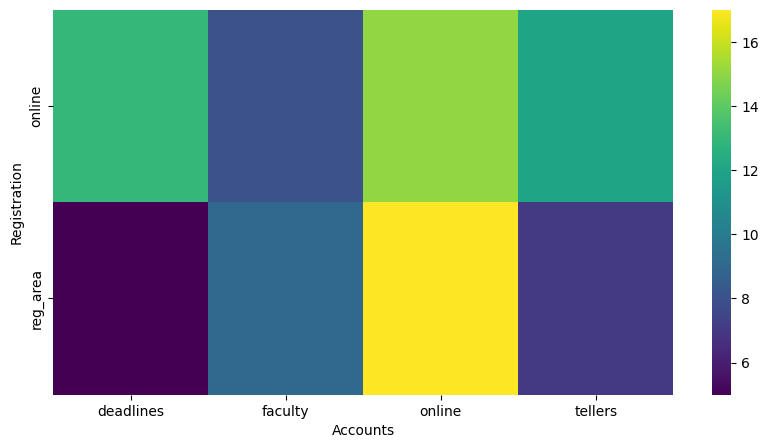

In [118]:
def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  plt.figure(figsize = (10,5))
  # plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)


chart = heatmap(data, *['Accounts', 'Registration'], **{})
chart

